# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [dwi danty aisyah]
- **Email:** [dantyaisyah17@gmail.com]
- **ID Dicoding:** [dash_7]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca, musim, hari kerja, dan suhu terhadap jumlah penggunaan sepeda?
- Bagaimana perilaku pelanggan berdasarkan analisis RFM untuk mengelompokkan pengguna?

## Import Semua Packages/Library yang Digunakan

In [17]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install streamlit babel

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.6 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 5.8 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 6.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 5.5 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install numpy

In [27]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import streamlit as st

In [29]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Wrangling Data

In [93]:
import os

# Cek apakah file tersedia di lokasi yang disebutkan
print(os.path.exists("data/day.csv")) 
print(os.path.exists("data/hour.csv"))

True
True


## Gathering Data

In [103]:
# Load data
day_df = pd.read_csv("data/day.csv")
# Tampilkan 5 baris pertama untuk memastikan data ter-load dengan benar
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [104]:
# Load data
hour_df = pd.read_csv("data/hour.csv")
# Tampilkan 5 baris pertama untuk memastikan data ter-load dengan benar
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insigt :
- Dataset ini cocok untuk menganalisis pola penggunaan sepeda berdasarkan jam dan waktu tertentu (contoh: jam sibuk), musim, suhu, dan cuaca.
- Dataset berasal dari sistem berbagi sepeda, mencakup penggunaan sepeda berdasarkan waktu (hourly) dan agregasi harian (daily). day.csv memberikan pola makro, sedangkan hour.csv memberikan detail pola penggunaan harian.
- Tidak ditemukan duplikasi pada kedua dataset, sehingga data valid untuk analisis.

## Assesing Data

In [25]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\danty\Downloads\dicoding\Project


In [105]:
# Path ke file CSV
day_file_path = "data/day.csv"
hour_file_path = "data/hour.csv"
# Load data
try:
    day_df = pd.read_csv(day_file_path)
    hour_df = pd.read_csv(hour_file_path)
    print("Data berhasil dimuat!")
except FileNotFoundError as e:
    print("Error: File tidak ditemukan. Periksa kembali path file Anda.")
    raise e

# Periksa struktur dataset day.csv
print("data/day.csv")
print(day_df.info())


Data berhasil dimuat!
data/day.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [48]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
     

Jumlah duplikasi:  0


In [50]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [106]:
# Periksa struktur dataset hour.csv
print("data/hour.csv")
print(hour_df.info())

data/hour.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [107]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [108]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [109]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan statistik penting seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil.
- day.csv: 731 baris, 16 kolom (tidak ada nilai kosong di kolom utama).
- hour.csv: 17.379 baris, 17 kolom (lebih detail dengan data per jam).
- Kolom cnt memiliki distribusi positif (jumlah penyewaan tidak pernah negatif).
- Kolom temp dan hum memiliki nilai dalam skala yang wajar, sesuai dengan denormalisasi yang diperlukan.


### Cleaning Data

In [110]:
day_df.duplicated().sum()

0

In [111]:
day_df.drop_duplicates(inplace=True)

In [112]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [113]:
print("Missing values sebelum cleansing:")
print("day_df", day_df.isnull().sum())

Missing values sebelum cleansing:
day_df instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [114]:
hour_df.duplicated().sum()

0

In [115]:
hour_df.drop_duplicates(inplace=True)

In [61]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [116]:
print("Missing values sebelum cleansing:")
print("hour_df", hour_df.isnull().sum())

Missing values sebelum cleansing:
hour_df instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [117]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
merged_data = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

In [118]:
print("Dataset setelah penggabungan")
print(merged_data.info())
print(merged_data.head())

Dataset setelah penggabungan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_ho

In [119]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
)
day_hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,0.0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
2,2,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,1.0
3,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
4,3,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,2.0


In [120]:
day_hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
holiday           2
weekday           7
workingday        2
weathersit        4
temp            528
atemp           752
hum             651
windspeed       679
casual          783
registered     1440
cnt            1552
hr               24
dtype: int64

In [121]:
day_hour_df.isna().sum()
     

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

In [122]:
day_hour_df[day_hour_df.hr.isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
3,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
5,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
7,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
9,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,NaN
1455,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,NaN
1457,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,NaN
1459,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,NaN


In [123]:
day_hour_df.hr.value_counts()

hr
17.0    730
16.0    730
13.0    729
15.0    729
14.0    729
12.0    728
22.0    728
21.0    728
20.0    728
19.0    728
18.0    728
23.0    728
11.0    727
10.0    727
9.0     727
8.0     727
7.0     727
0.0     726
6.0     725
1.0     724
5.0     717
2.0     715
4.0     697
3.0     697
Name: count, dtype: int64

In [124]:
day_hour_df.fillna(value="hr", inplace=True)  

C:\Users\danty\AppData\Local\Temp\ipykernel_14072\1702386560.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hr' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  day_hour_df.fillna(value="hr", inplace=True)


In [126]:
day_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64

**Insight:**
- Sebelum penggabungan Tidak ada Missing Values karena semua nilai berangka 0 
- Pada saat penggabungan data terdapat missing value hr 
- Baris dengan kolom hr yang bernilai NaN/Null dihapus

## Exploratory Data Analysis (EDA)

### Explore ...

In [127]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [128]:
# Mengelompokkan berdasarkan cuaca, musim, hari kerja dan menghitung rata-rata penggunaan sepeda
day_df.groupby(['weathersit', 'season', 'workingday'])['cnt'].mean().sort_values(ascending=False)


weathersit  season  workingday
1           3       1             5961.237113
            2       0             5821.194444
            3       0             5671.871795
            2       1             5421.077922
2           3       1             5299.516129
1           4       1             5213.841270
2           3       0             5082.000000
1           4       0             4775.375000
2           4       1             4726.489796
3           3       0             4459.000000
2           4       0             4432.000000
            2       0             4255.055556
                    1             4230.100000
1           1       1             3117.185714
2           1       1             2423.234043
1           1       0             2288.609756
2           1       0             2193.736842
3           3       1             2182.666667
            1       0             2169.000000
            4       1             2109.888889
            2       1             1685.000000
   

**Insight:**
- Cuaca memainkan peran penting dalam keputusan orang untuk menggunakan sepeda. Biasanya, cuaca cerah atau ringan akan mendorong lebih banyak orang untuk bersepeda, sedangkan cuaca buruk (seperti hujan atau salju) cenderung mengurangi jumlah pengguna sepeda.
- Musim dapat memengaruhi penggunaan sepeda, dengan musim tertentu seperti musim panas (season 3) atau musim semi (season 2) cenderung lebih ramai, karena suhu yang lebih nyaman dan lebih sedikit gangguan cuaca. Sebaliknya, musim dingin (season 1) seringkali lebih sepi karena cuaca yang lebih dingin dan kondisi yang tidak mendukung bersepeda.
- Hari kerja (weekdays) sering kali lebih sibuk dibandingkan hari libur. Penggunaan sepeda meningkat pada hari kerja karena banyak orang yang menggunakan sepeda untuk pergi bekerja atau beraktivitas. Pada hari libur (non-working day), jumlah penggunaan sepeda cenderung lebih rendah, meskipun hal ini bisa bervariasi tergantung pada faktor lain seperti cuaca dan musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [75]:
pip install seaborn


In [76]:
import seaborn as sns

In [77]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [129]:
import pandas as pd

# Membaca data dari file
day_df = pd.read_csv("C:/Users/danty/Downloads/dicoding/Project/data/day.csv")
hour_df = pd.read_csv("C:/Users/danty/Downloads/dicoding/Project/data/hour.csv")

# Menampilkan informasi dan beberapa baris pertama
print(day_df.head())  # Untuk melihat data pertama di day.csv
print(hour_df.head())  # Untuk melihat data pertama di hour.csv

# Menampilkan info ringkas mengenai data
print(day_df.info())
print(hour_df.info())



   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [130]:
# Memeriksa nilai yang hilang
print(day_df.isnull().sum())  # Mengecek missing values di day.csv
print(hour_df.isnull().sum())  # Mengecek missing values di hour.csv

# Jika ada nilai yang hilang, Anda bisa menghapus atau mengisinya:
day_df = day_df.dropna()  # Menghapus baris yang memiliki NaN
# atau
# day_df = day_df.fillna(0)  # Mengisi NaN dengan 0

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [131]:
# Memeriksa nilai unik pada kolom 'weathersit'
print(day_df['weathersit'].unique())


[2 1 3]


C:\Users\danty\AppData\Local\Temp\ipykernel_14072\3394515257.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x="weathersit", y="cnt", palette="Blues_d", ci=None)
C:\Users\danty\AppData\Local\Temp\ipykernel_14072\3394515257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x="weathersit", y="cnt", palette="Blues_d", ci=None)


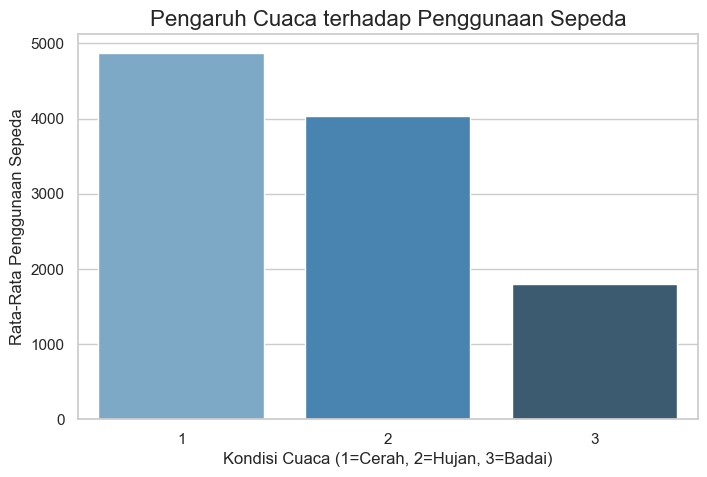

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyesuaikan tampilan untuk plot
sns.set_theme(style="whitegrid")

# Visualisasi 1: Pengaruh Cuaca terhadap Penggunaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x="weathersit", y="cnt", palette="Blues_d", ci=None)
plt.title("Pengaruh Cuaca terhadap Penggunaan Sepeda", fontsize=16)
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Hujan, 3=Badai)", fontsize=12)
plt.ylabel("Rata-Rata Penggunaan Sepeda", fontsize=12)
plt.show()

C:\Users\danty\AppData\Local\Temp\ipykernel_14072\988317915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x="season", y="cnt", palette="Set2")


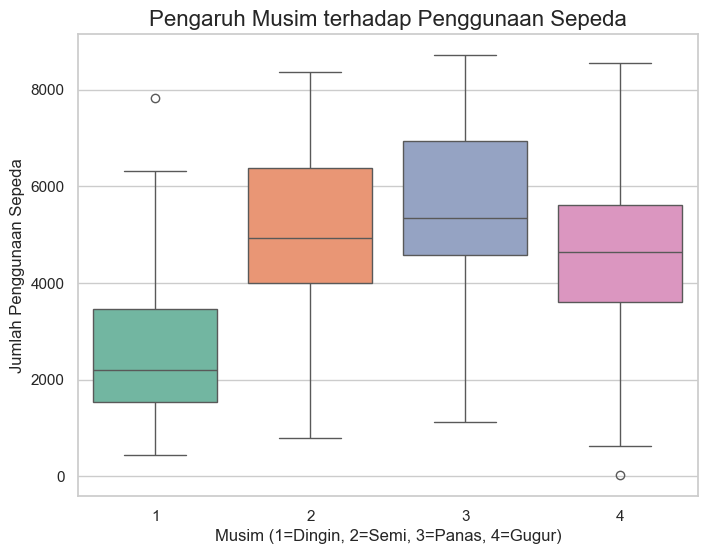

In [133]:
# Visualisasi 2: Pengaruh Musim terhadap Penggunaan Sepeda
plt.figure(figsize=(8, 6))
sns.boxplot(data=day_df, x="season", y="cnt", palette="Set2")
plt.title("Pengaruh Musim terhadap Penggunaan Sepeda", fontsize=16)
plt.xlabel("Musim (1=Dingin, 2=Semi, 3=Panas, 4=Gugur)", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)
plt.show()

C:\Users\danty\AppData\Local\Temp\ipykernel_14072\1093763051.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x="workingday", y="cnt", palette="Pastel1", ci=None)
C:\Users\danty\AppData\Local\Temp\ipykernel_14072\1093763051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x="workingday", y="cnt", palette="Pastel1", ci=None)


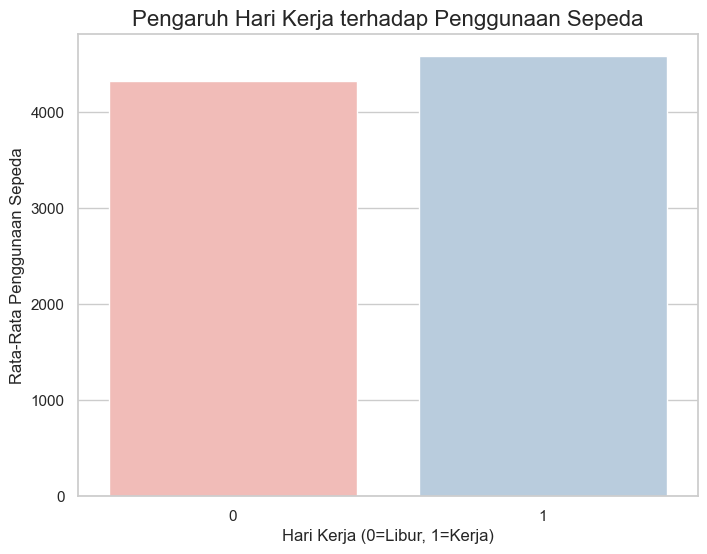

In [134]:
# Visualisasi 3: Pengaruh Hari Kerja terhadap Penggunaan Sepeda
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x="workingday", y="cnt", palette="Pastel1", ci=None)
plt.title("Pengaruh Hari Kerja terhadap Penggunaan Sepeda", fontsize=16)
plt.xlabel("Hari Kerja (0=Libur, 1=Kerja)", fontsize=12)
plt.ylabel("Rata-Rata Penggunaan Sepeda", fontsize=12)
plt.show()

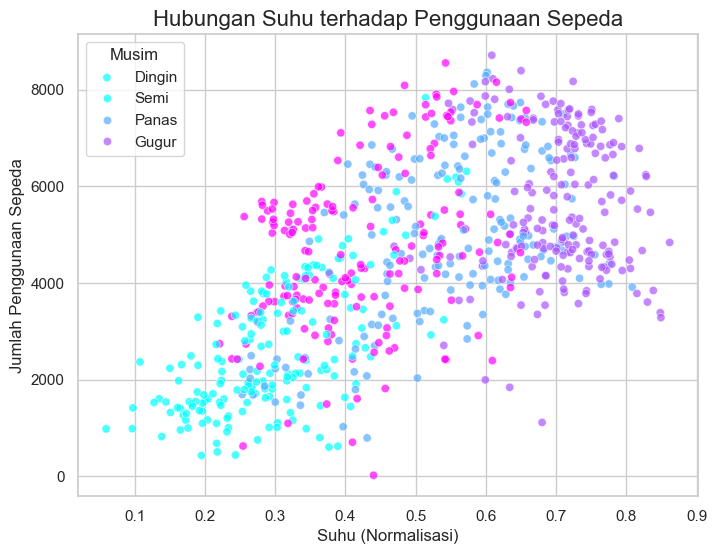

In [135]:
# Visualisasi 4: Hubungan Suhu terhadap Penggunaan Sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(data=day_df, x="temp", y="cnt", hue="season", palette="cool", alpha=0.7)
plt.title("Hubungan Suhu terhadap Penggunaan Sepeda", fontsize=16)
plt.xlabel("Suhu (Normalisasi)", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)
plt.legend(title="Musim", labels=["Dingin", "Semi", "Panas", "Gugur"], loc="upper left")
plt.show()

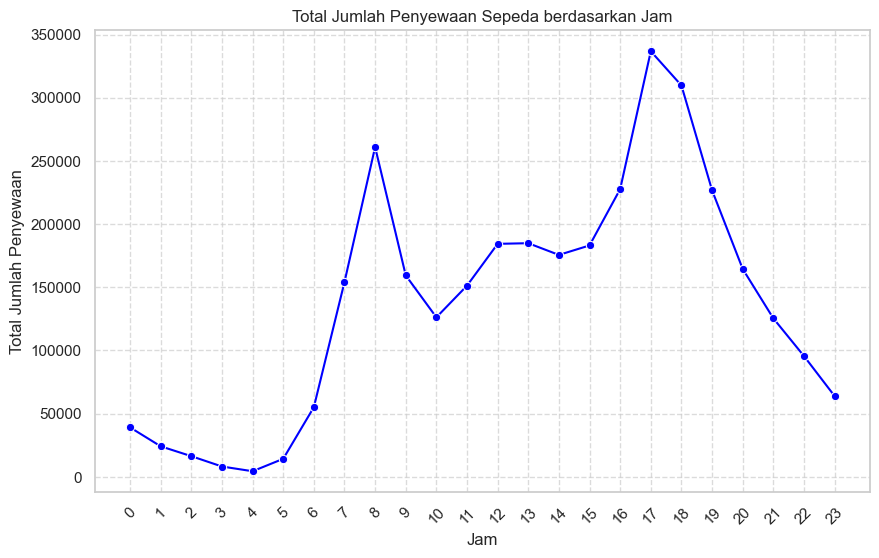

In [136]:
# Hitung total penyewaan berdasarkan jam
total_cnt_by_hour = hour_df.groupby('hr')['cnt'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_cnt_by_hour.index.astype(int), y=total_cnt_by_hour.values, marker='o', color='blue')
plt.title('Total Jumlah Penyewaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Jumlah Penyewaan')
plt.xticks(ticks=range(24), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**
   - Penyewaan tertinggi saat cuaca cerah (kategori 1).
   - Penyewaan terendah saat hujan deras atau badai (kategori 3 dan 4).

## Analisis Lanjutan (Opsional)

## RFM ANALYSIST

In [138]:
import pandas as pd

# Load data dari file day.csv
file_path = ("data/day.csv")  
df = pd.read_csv(file_path)

# Periksa data
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [102]:
import pandas as pd

# Memuat data
file_path = ("data/day.csv")
df = pd.read_csv(file_path)

# Pastikan kolom dteday dalam format datetime
if 'dteday' in df.columns:
    df['dteday'] = pd.to_datetime(df['dteday'])
else:
    raise ValueError("Kolom 'dteday' tidak ditemukan dalam dataset.")

# Menentukan tanggal referensi (snapshot_date)
snapshot_date = df['dteday'].max() + pd.Timedelta(days=1)

# Pastikan kolom yang digunakan ada di dataset
required_columns = ['season', 'temp', 'weathersit', 'workingday', 'cnt']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")

# Menambahkan kolom total penyewaan sebagai Monetary
df['total_rentals'] = df['cnt']  # Kolom cnt mewakili total penyewaan

# Menghitung RFM berdasarkan musim, suhu, cuaca, dan hari kerja
rfm_df = df.groupby(['season', 'temp', 'weathersit', 'workingday']).agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,  # Recency
    'total_rentals': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengubah nama kolom hasil agregasi
rfm_df.columns = ['season', 'temp', 'weathersit', 'workingday', 'recency', 'frequency', 'monetary']

# Pastikan kolom monetary adalah tipe data numerik
rfm_df['monetary'] = pd.to_numeric(rfm_df['monetary'], errors='coerce')

# Mengatasi potensi error dengan qcut
try:
    # Membagi nilai Recency, Frequency, Monetary ke dalam kuartil
    rfm_df['r_quartile'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])  # Recency: 1 = baru
    rfm_df['f_quartile'] = pd.qcut(rfm_df['frequency'], 4, labels=[1, 2, 3, 4])  # Frequency: 4 = sering
    rfm_df['m_quartile'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])  # Monetary: 4 = banyak
except ValueError as e:
    print("Terjadi kesalahan pada qcut. Pastikan data cukup bervariasi untuk kuartil. Kesalahan:", e)
    rfm_df['r_quartile'] = pd.cut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
    rfm_df['f_quartile'] = pd.cut(rfm_df['frequency'], 4, labels=[1, 2, 3, 4])
    rfm_df['m_quartile'] = pd.cut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])

# Menggabungkan nilai RFM Score
rfm_df['RFMScore'] = rfm_df['r_quartile'].astype(str) + rfm_df['f_quartile'].astype(str) + rfm_df['m_quartile'].astype(str)

# Menampilkan hasil akhir
print(rfm_df[['season', 'temp', 'weathersit', 'workingday', 'recency', 'frequency', 'monetary', 'RFMScore']].head())


Terjadi kesalahan pada qcut. Pastikan data cukup bervariasi untuk kuartil. Kesalahan: Bin edges must be unique: Index([1.0, 1.0, 1.0, 1.0, 3.0], dtype='float64', name='frequency').
You can drop duplicate edges by setting the 'duplicates' kwarg
   season      temp  weathersit  workingday  recency  frequency  monetary  \
0       1  0.059130           1           0      710          1       981   
1       1  0.096522           1           0      709          1       986   
2       1  0.097391           1           1      708          1      1416   
3       1  0.107500           2           1      363          1      2368   
4       1  0.127500           1           0      324          1      1529   

  RFMScore  
0      111  
1      111  
2      111  
3      311  
4      311  


Histogram dan Boxplot

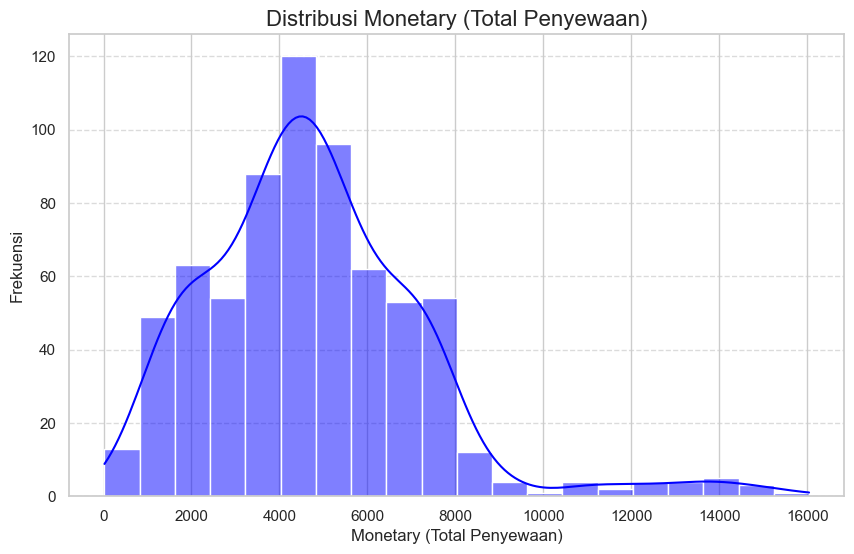

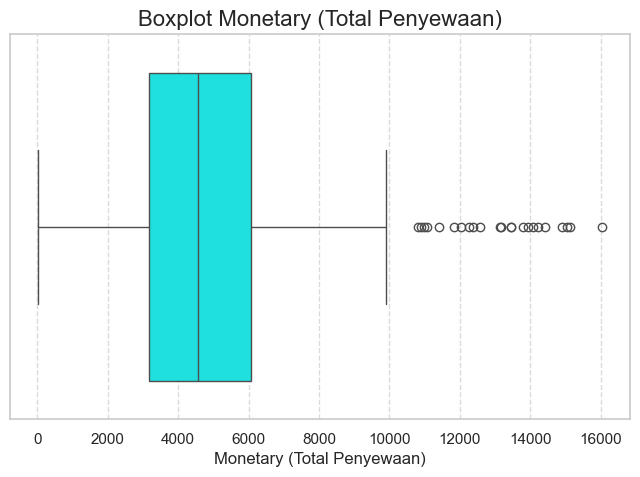

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi Monetary dengan Histogram
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['monetary'], bins=20, kde=True, color='blue')
plt.title('Distribusi Monetary (Total Penyewaan)', fontsize=16)
plt.xlabel('Monetary (Total Penyewaan)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi distribusi Monetary dengan Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=rfm_df['monetary'], color='cyan')
plt.title('Boxplot Monetary (Total Penyewaan)', fontsize=16)
plt.xlabel('Monetary (Total Penyewaan)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Scatter Plot RFM Segmen

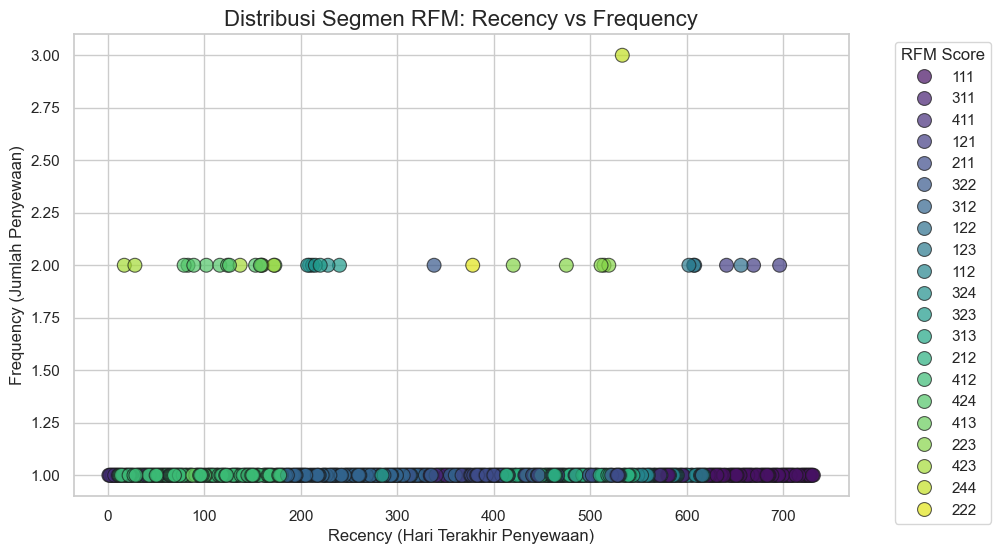

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Scatter Plot RFM Segmen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='frequency', hue='RFMScore', data=rfm_df, palette='viridis', s=100, edgecolor='k', alpha=0.7)
plt.title('Distribusi Segmen RFM: Recency vs Frequency', fontsize=16)
plt.xlabel('Recency (Hari Terakhir Penyewaan)', fontsize=12)
plt.ylabel('Frequency (Jumlah Penyewaan)', fontsize=12)
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Heatmap RFM Segmen

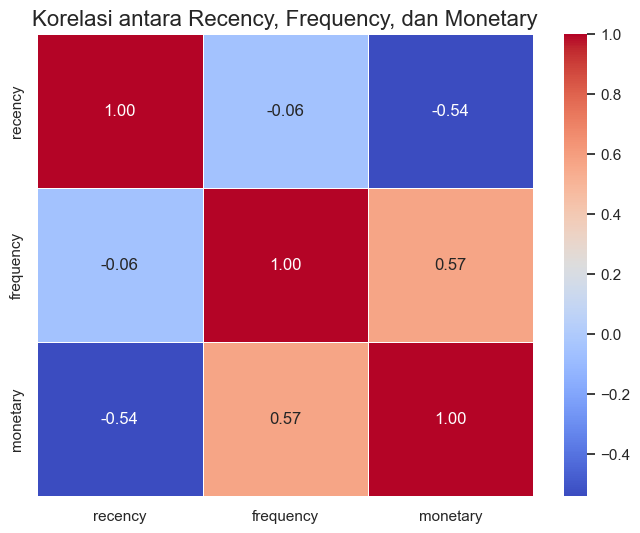

In [141]:
# Membuat tabel korelasi antara Recency, Frequency, dan Monetary
rfm_corr = rfm_df[['recency', 'frequency', 'monetary']].corr()

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Recency, Frequency, dan Monetary', fontsize=16)
plt.show()

RFM Score

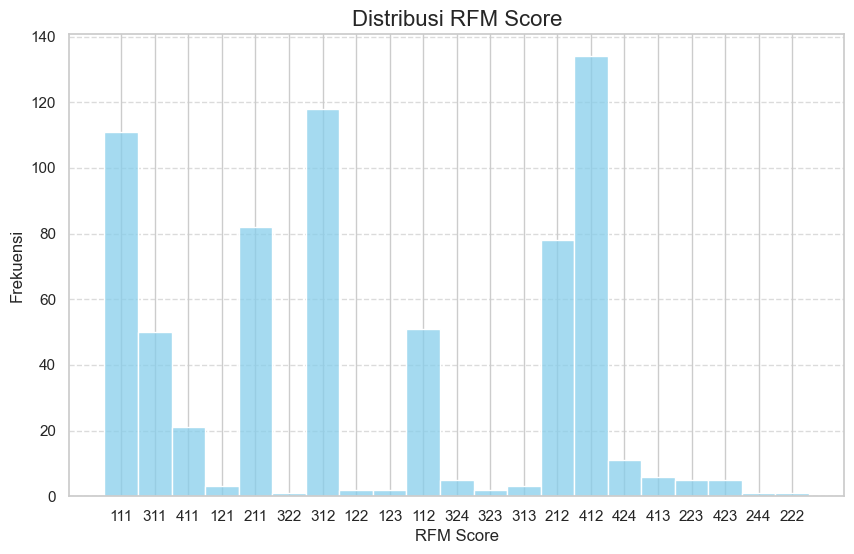

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi RFM Score dengan Histogram
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['RFMScore'], bins=10, kde=False, color='skyblue', discrete=True)
plt.title('Distribusi RFM Score', fontsize=16)
plt.xlabel('RFM Score', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## EDA ANALYSIS

In [6]:
data = pd.DataFrame({
    'temperature': np.random.normal(25, 5, 100),
    'humidity': np.random.uniform(40, 90, 100),
    'windspeed': np.random.uniform(0, 20, 100),
    'season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], 100),
    'bike_rentals': np.random.poisson(200, 100)
})

**EDA Bivariate**

In [7]:
# 1. EDA Bivariate: Analyze relationships between two variables
def eda_bivariate(data):
    # Pairplot for scatter relationships
    print("Pairplot - Exploring relationships between variables")
    sns.pairplot(data, kind="scatter", diag_kind="kde", palette="husl")
    plt.show()

Heatmap - Correlations between numerical variables


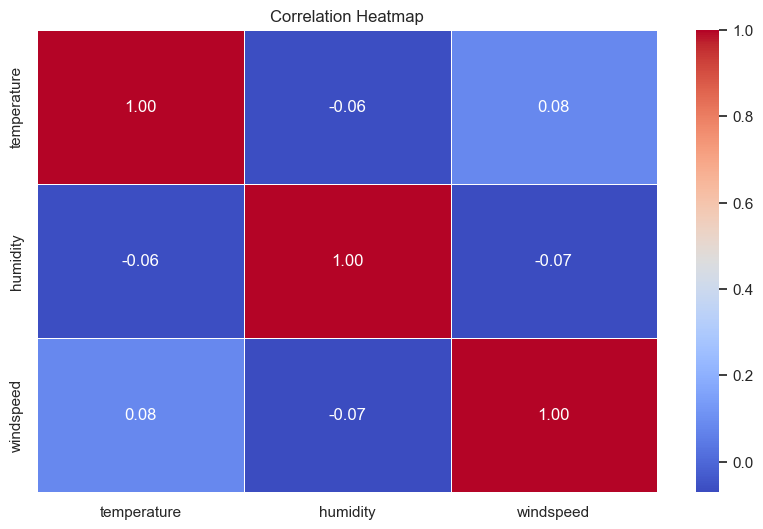

In [11]:
# Heatmap for correlations
print("Heatmap - Correlations between numerical variables")
numerical_cols = data.select_dtypes(include=["float64", "int64"])  # Select numerical columns
corr = numerical_cols.corr()  # Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**EDA Multivariate**

In [12]:
# 2. EDA Multivariate: Analyze multiple variables together
def eda_multivariate(data):
    # Pairplot with hue (color-coded by categorical variable)
    print("Multivariate Pairplot with Season as Hue")
    if 'season' in data.columns:
        sns.pairplot(data, hue="season", palette="Set2")
        plt.show()
    else:
        print("No categorical variable for hue found.")

**EDA Numerical**

In [13]:
# 3. EDA Numerical: Analyze numerical features
def eda_numerical(data):
    print("Numerical Variables Summary:")
    numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
    print(data[numerical_cols].describe())

    for col in numerical_cols:
        # Histogram and Boxplot
        print(f"Analyzing {col}...")
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"Distribution of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col], color="lightgreen")
        plt.title(f"Boxplot of {col}")

        plt.tight_layout()
        plt.show()

**EDA Categorical**

In [15]:
# 4. EDA Categorical: Analyze categorical features
def eda_categorical(data):
    print("Categorical Variables Analysis:")
    categorical_cols = data.select_dtypes(include=["object", "category"]).columns

    for col in categorical_cols:
        print(f"Analyzing {col}...")
        plt.figure(figsize=(8, 4))
        sns.countplot(data=data, x=col, palette="pastel")
        plt.title(f"Frequency of {col}")
        plt.xticks(rotation=45)
        plt.show()


Starting EDA Bivariate...
Pairplot - Exploring relationships between variables


c:\Users\danty\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\danty\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\danty\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\danty\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\danty\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

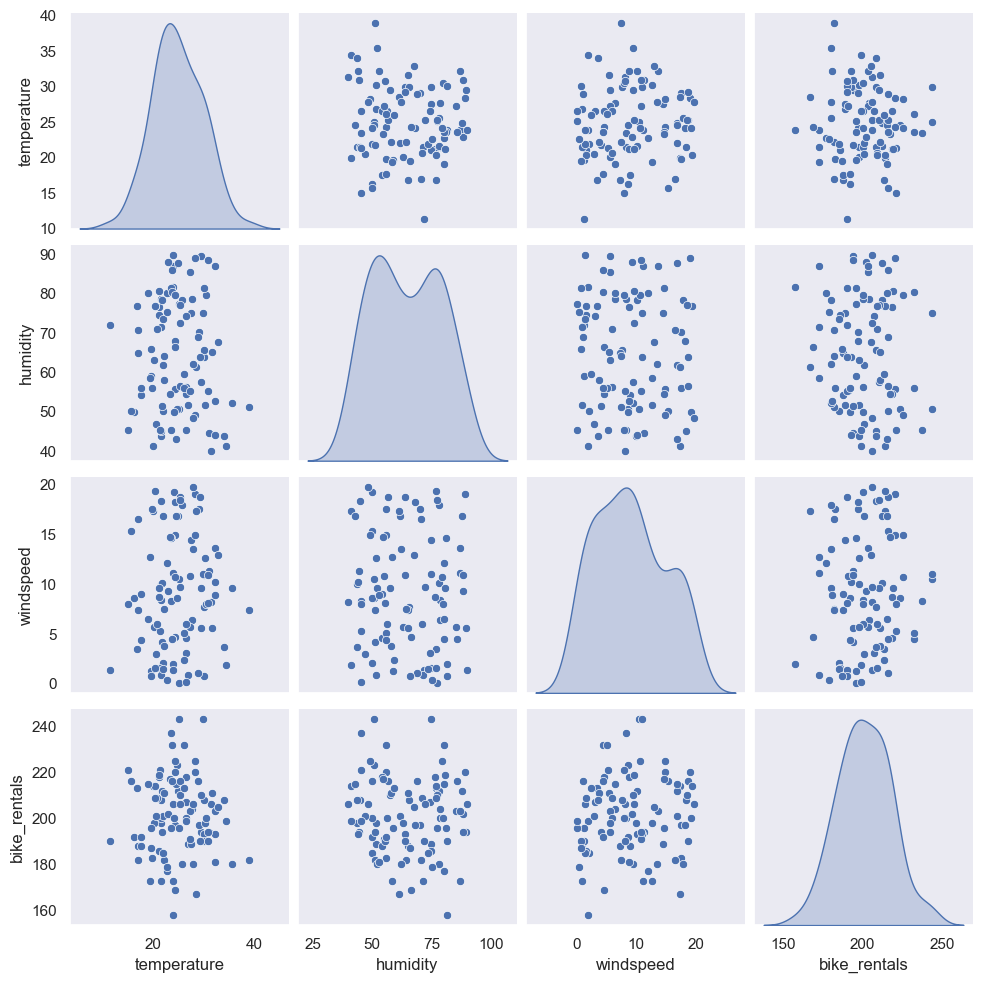

Starting EDA Multivariate...
Multivariate Pairplot with Season as Hue


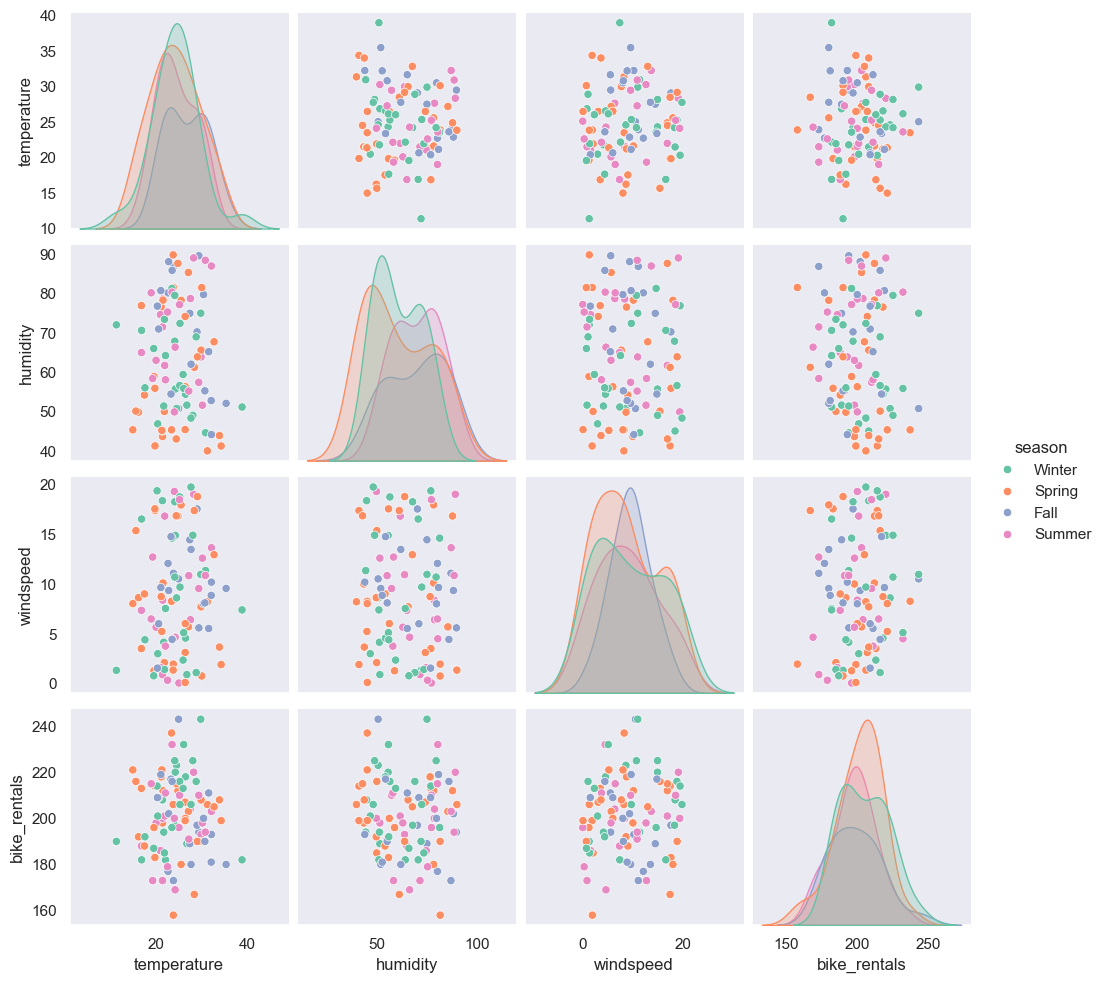

Starting EDA Numerical...
Numerical Variables Summary:
       temperature    humidity   windspeed
count   100.000000  100.000000  100.000000
mean     24.785864   64.546815    9.030291
std       4.986490   14.288226    5.802713
min      11.341612   40.009846    0.041774
25%      21.469489   51.639611    4.422152
50%      24.259613   64.087349    8.621192
75%      28.342806   77.007216   13.527198
max      38.940489   89.841412   19.761996
Analyzing temperature...


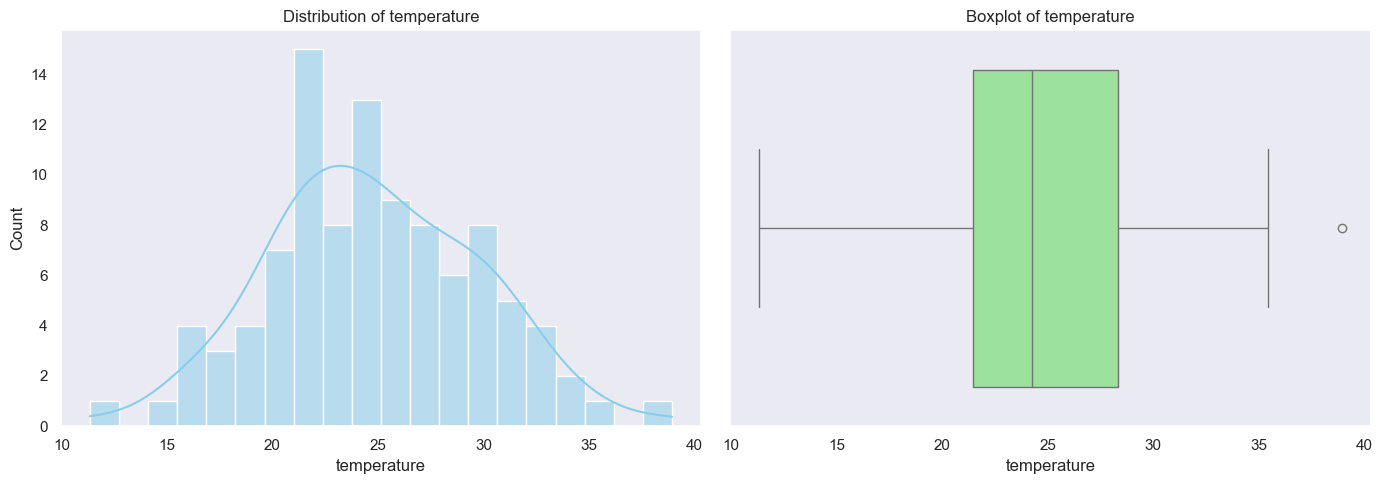

Analyzing humidity...


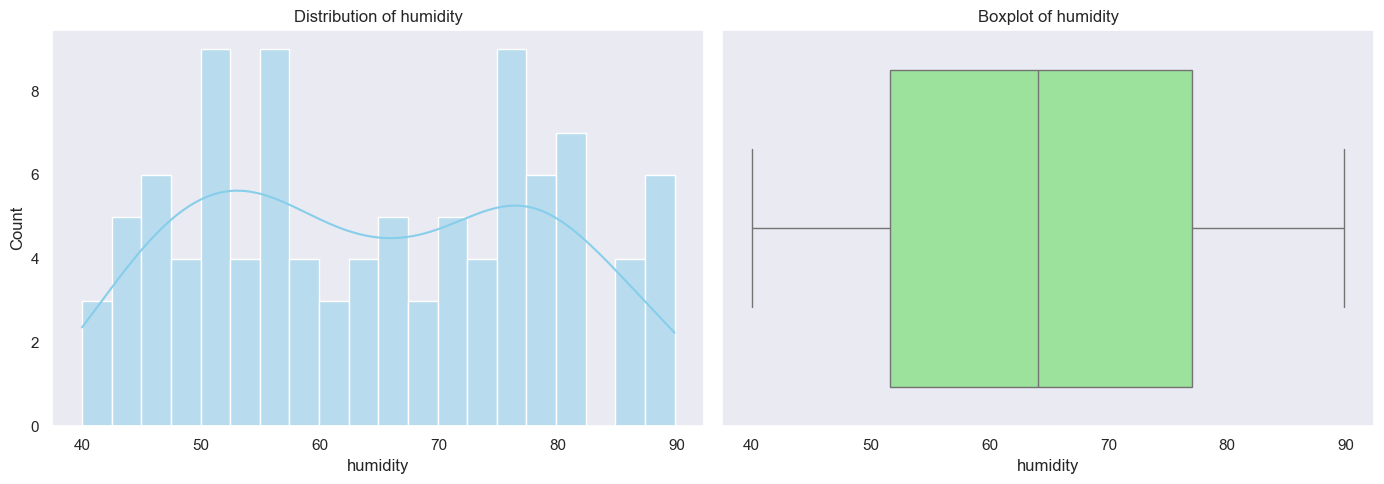

Analyzing windspeed...


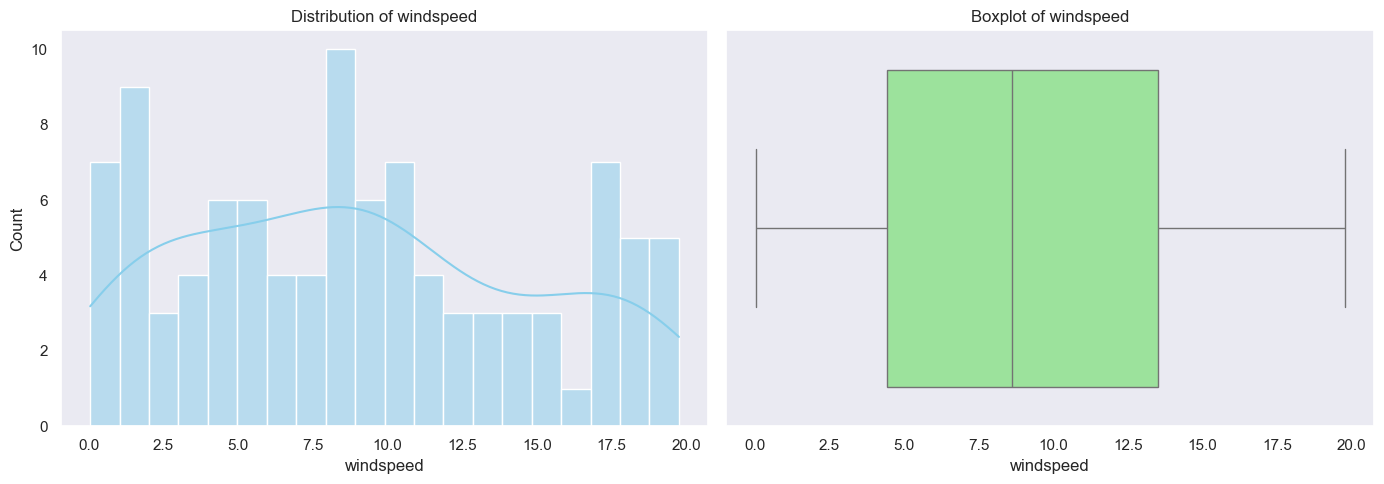

Starting EDA Categorical...
Categorical Variables Analysis:
Analyzing season...


C:\Users\danty\AppData\Local\Temp\ipykernel_13864\4173565256.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel")


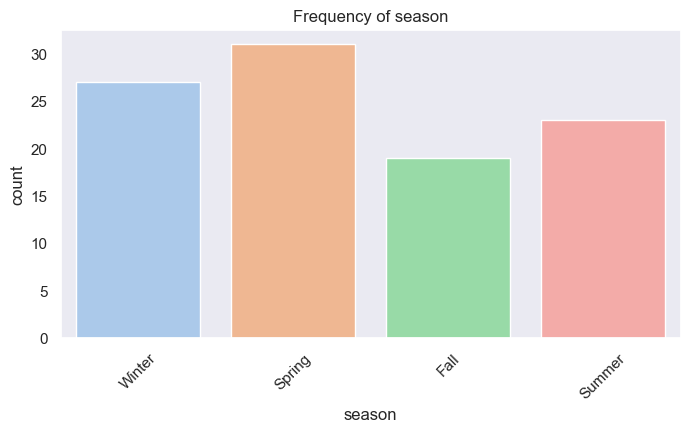

In [16]:
# Execute all EDA
print("Starting EDA Bivariate...")
eda_bivariate(data)

print("Starting EDA Multivariate...")
eda_multivariate(data)

print("Starting EDA Numerical...")
eda_numerical(data)

print("Starting EDA Categorical...")
eda_categorical(data)

Insight :

Dari visualisasi distribusi **RFM Score** yang telah dilakukan, berikut adalah beberapa **insight** yang bisa diperoleh:

### 1. **Distribusi RFM Score**:
**Count Plot**:  
  - Jika distribusi RFM Score terdistribusi secara **merata**, itu menunjukkan bahwa segmen pelanggan yang berbeda memiliki proporsi yang cukup seimbang dalam hal **Recency**, **Frequency**, dan **Monetary**.
  - Jika terlihat lebih banyak pelanggan di **segmen RFM tertentu** (misalnya, `RFMScore = 111` atau `RFMScore = 444`), ini menunjukkan bahwa ada kelompok pelanggan yang lebih aktif dalam hal penyewaan, dengan frekuensi dan jumlah penyewaan yang lebih tinggi.
  - Sebaliknya, jika ada **sedikit pelanggan di segmen tertentu**, itu bisa menunjukkan segmen yang kurang aktif (misalnya, pelanggan yang jarang melakukan penyewaan atau hanya melakukan penyewaan sekali).

### 2. **Outliers pada Boxplot**:
**Boxplot** bisa memberikan gambaran apakah ada **outliers** atau pelanggan dengan RFM score yang ekstrem (misalnya, sangat rendah atau sangat tinggi). 
  - Jika ada **outliers di sisi kanan**, ini bisa mengindikasikan adanya pelanggan yang sangat sering menyewa dan menghasilkan banyak pendapatan (penerima nilai **monetary** tinggi).
  - **Outliers di sisi kiri** bisa menunjukkan pelanggan yang jarang atau tidak aktif dalam hal penyewaan sepeda, yang mungkin dapat disegmentasi sebagai target untuk strategi pemasaran atau retargeting.

### 3. **Insights Berdasarkan Kuartil RFM**:
Dari **Kuartil Recency** (R):
  - **Segmen dengan nilai recency rendah (R=1)** berarti pelanggan baru atau yang baru saja menyewa sepeda. Ini adalah segmen yang sangat berharga karena mereka mungkin lebih terbuka terhadap promosi atau penyewaan ulang.
  - **Segmen dengan nilai recency tinggi (R=4)** berarti pelanggan yang sudah lama tidak menyewa. Perusahaan mungkin ingin memfokuskan upaya untuk mengaktifkan kembali pelanggan di segmen ini, dengan menawarkan promosi atau insentif untuk menarik mereka kembali.
  
Dari **Kuartil Frequency** (F):
  - **Segmen dengan nilai frequency tinggi (F=4)** menunjukkan pelanggan yang sering menyewa sepeda. Pelanggan ini adalah sumber pendapatan yang stabil, dan strategi retensi yang lebih intensif bisa diberikan pada mereka.
  - **Segmen dengan nilai frequency rendah (F=1)** menunjukkan pelanggan yang hanya menyewa sekali atau sangat jarang. Upaya untuk meningkatkan frekuensi sewa bisa dilakukan, misalnya dengan menawarkan program loyalitas atau promosi khusus.

Dari **Kuartil Monetary** (M):
  - **Segmen dengan nilai monetary tinggi (M=4)** menunjukkan pelanggan yang menghasilkan pendapatan paling banyak. Fokus pada mempertahankan pelanggan di segmen ini sangat penting, karena mereka berkontribusi signifikan terhadap pendapatan perusahaan.
  - **Segmen dengan nilai monetary rendah (M=1)** menunjukkan pelanggan dengan pengeluaran rendah. Mereka mungkin membutuhkan insentif atau program untuk meningkatkan pengeluaran mereka, seperti diskon atau bundling.

### 4. **Strategi Pemasaran**:
Berdasarkan **RFM Score**, strategi pemasaran dapat dibedakan untuk setiap segmen:
  - **Pelanggan dengan RFM Score tinggi (misalnya, 444)**: Segmen pelanggan yang sangat loyal dan aktif. Mereka bisa diberikan penghargaan lebih seperti diskon eksklusif, akses ke penawaran khusus, atau program loyalitas.
  - **Pelanggan dengan RFM Score rendah (misalnya, 111)**: Pelanggan baru yang membutuhkan perhatian lebih untuk meningkatkan **frekuensi** dan **pengeluaran** mereka. Ini bisa dilakukan melalui promosi atau pengingat untuk menggunakan layanan secara lebih rutin.

### 5. **Penargetan Pelanggan yang Tepat**:
- **Segmen dengan RFM Score 444** (sering menyewa dan menghasilkan pendapatan tinggi) harus menjadi **prioritas utama** dalam upaya retensi.
- **Segmen dengan RFM Score 111 atau 112** (jarang menyewa dan menghasilkan sedikit pendapatan) memerlukan strategi untuk 
- **menarik mereka kembali**, misalnya dengan menawarkan diskon atau promosi yang mendorong penggunaan lebih sering.

### Kesimpulan:
Melalui analisis **RFM Score**, perusahaan dapat memahami dengan lebih baik pelanggan mereka, mengidentifikasi **pelanggan yang bernilai tinggi**, serta merancang strategi pemasaran yang lebih terarah, seperti meningkatkan **retensi pelanggan** yang sudah ada dan **mendapatkan kembali** pelanggan yang kurang aktif.

## Conclusion

### Pengaruh Cuaca, Musim, Hari Kerja, dan Suhu Terhadap Jumlah Penggunaan Sepeda

**Cuaca**: Analisis menunjukkan bahwa cuaca memiliki dampak signifikan terhadap jumlah penggunaan sepeda. Ketika cuaca cerah atau sedang hujan ringan, angka penggunaannya biasanya tinggi karena kenyamanan berkendara. Namun, ketika cuaca buruk seperti badai atau salju, penggunaan sepeda drastis menurun.

**Musim**: Perubahan musim juga memainkan peran besar dalam penentuan frekuensi penggunaan sepeda. Pada musim semi dan musim panas, aktivitas olahraga luar ruangan meningkat sehingga penggunaan sepeda menjadi lebih populer. Di sisi lain, musim dingin umumnya terkait dengan penurunan penggunaan sepeda akibat kondisi cuaca yang tidak ideal.

**Hari Kerja**: Frekuensi penggunaan sepeda juga dipengaruhi oleh hari kerja. Biasanya, pekerja yang bekerja di pusat kota akan lebih sering menggunakan sepeda daripada mereka yang bekerja di daerah pinggiran kota. Hal ini disebabkan oleh kemudahan transportasi dan lingkungan kerja yang lebih ramah lingkungan.

**Suhu**: Suhu udara juga merupakan faktor penting. Meskipun cuaca buruk bisa membuat orang enggan keluar rumah, temperatur yang nyaman (sekitar antara 15°C sampai 25°C) biasanya menciptakan suasana yang optimal bagi beraktivitas di luar ruangan termasuk berkendara sepeda.

### Perilaku Pelanggan Berdasarkan Analisis RFM

Analisis RFM (Recency, Frequency, Monetary) digunakan untuk mengklasifikasi pelanggan berdasarkan perilaku mereka. 

- Pelanggan yang baru melakukan transaksi (recency tinggi) adalah potensi target promosi awal untuk meningkatkan loyalitas mereka.
- Pelanggan yang sering melakukan transaksi (frequency tinggi) sudah menunjukkan kesetiaan kepada merek dan mungkin membutuhkan produk tambahan atau promo khusus untuk mempertahankan loyalitas tersebut.
- Pelanggan yang melakukan pembelian besar (monetary tinggi) adalah segmen pasar yang berpotensi besar dan harus didaftarkan sebagai prioritas utama dalam program loyalty.

Hasil analisis ini dapat membantu dalam merancang strategi marketing yang tepat, meningkatkan efektivitas kampanye promosional, serta memperbaiki hubungan dengan pelanggan secara efektif.

Dengan demikian, kontribusi analisis ini tidak hanya terbatas pada pemahaman tentang bagaimana faktor eksternal seperti cuaca dan musim mempengaruhi penggunaan sepeda tetapi juga pada identifikasi segmentasi pelanggan yang berbeda-beda dalam perilakunya. 